# Data Fundamentals 07- Predictive Machine Learning

- Author: [Megan Chastain](https://github.com/Megan-Chastain1)
- Repository: [datafun-7-ml](https://github.com/Megan-Chastain1/datafun-07-ml)
- Date: 10/9/2025

## Introduction
-- The following project explores how to perform linear regressions on data and use that information to create a predictive model. Two modules will be used to demonstrate different ways to perform linear regressions on temperature data collected only in January between 1895 and 2018. SciKit and Sklearn are both then able to use the linear regression they've created to find predictive values for the year 2024. We'll start with seeing how easy it is for Python to graph basic data about temperature in Celsius and Fahrenheit.

## Imports

In [307]:
import jupyterlab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

## Part 1 - Chart a Straight Line

### Relationship Between Fahrenheit and Celsius

In [308]:
c=lambda f:5/9*(f-32)

In [309]:
temps=[(f,c(f)) for f in range (0,101,10)]

### Pulling and Investigating Temperature Data

In [310]:
temps_df=pd.DataFrame(temps,columns=['Fahreneit','Celsius'])


In [311]:
temps_df.columns

Index(['Fahreneit', 'Celsius'], dtype='object')

In [312]:
temps_df.head()

,Fahreneit,Celsius
0,0,-17.78
1,10,-12.22
2,20,-6.67
3,30,-1.11
4,40,4.44


### Graphing Temperature Data

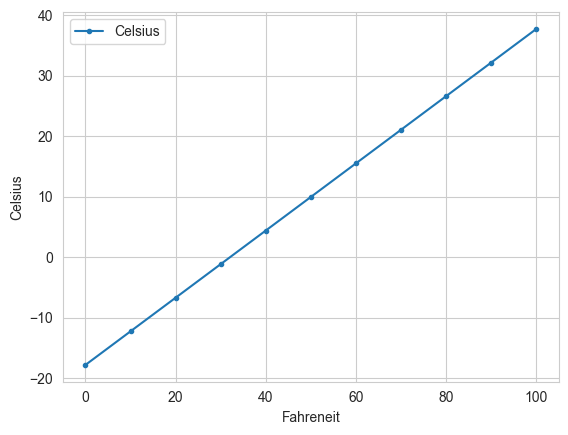

In [313]:
axes= temps_df.plot(x='Fahreneit', y='Celsius', style='.-')
y_label=axes.set_ylabel('Celsius')

## Part 2. Prediction

### Section 1- Data Aquisition

In [314]:
nyc=pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2- Data Inspection

In [315]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.20,-3.20
1,189601,34.70,-2.70
2,189701,35.50,-1.90
3,189801,39.60,2.20
4,189901,36.40,-1.00


In [316]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.50,-1.90
120,201501,36.10,-1.30
121,201601,40.80,3.40
122,201701,42.80,5.40
123,201801,38.70,1.30


### Section 3- Data Cleaning

In [317]:
nyc.columns=['Date','Temperature','Anomaly']

In [318]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.20,-3.20
1,189601,34.70,-2.70
2,189701,35.50,-1.90


In [319]:
nyc.Date.dtype

dtype('int64')

In [320]:
nyc.Date=nyc.Date.floordiv(100)

In [321]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.20,-3.20
1,1896,34.70,-2.70
2,1897,35.50,-1.90


### Section 4- Descriptive Statistics

In [322]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [323]:
nyc.Temperature.describe()

count   124.00
mean     37.60
std       4.54
min      26.10
25%      34.58
50%      37.60
75%      40.60
max      47.60
Name: Temperature, dtype: float64

### Section 5- Build the Model

In [324]:
from scipy import stats

In [325]:
linear_regression=stats.linregress(x=nyc.Date,y=nyc.Temperature)

In [326]:
linear_regression.slope

np.float64(0.014771361132966163)

In [327]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6- Predict

In [328]:
linear_regression.slope*2024+linear_regression.intercept

np.float64(38.5922281667978)

In [329]:
linear_regression.slope*1890+linear_regression.intercept

np.float64(36.612865774980335)

### Section 7- Visualizations

In [330]:
sns.set_style('whitegrid')

(10.0, 70.0)

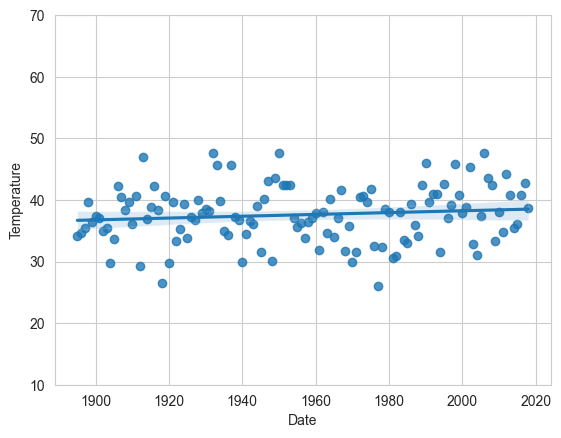

In [331]:
axes=sns.regplot(x=nyc.Date,y=nyc.Temperature)
axes.set_ylim(10,70)

## Part 3 Prediction

## Section 1- Build the Model

In [332]:
from sklearn.model_selection import train_test_split

In [333]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values,random_state=11)

In [334]:
X_train.shape

(93, 1)

In [335]:
X_test.shape

(31, 1)

In [336]:
from sklearn.linear_model import LinearRegression

In [337]:
linear_regression=LinearRegression()

In [338]:
linear_regression.fit(X=X_train,y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [339]:
linear_regression.coef_

array([0.01939167])

In [340]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

## Section 2- Test the Model

In [341]:
predicted=linear_regression.predict(X_test)

In [342]:
expected=y_test

In [343]:
for p,e in zip(predicted[::5],expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


## Section 3- Prediction

In [344]:
predict=(lambda x:linear_regression.coef_ * x + linear_regression.intercept_)

In [345]:
predict(2019)

array([38.84399018])

In [346]:
predict(1890)

array([36.34246432])

In [347]:
predict(2024)

array([38.94094855])

## Section 3- Visualizations

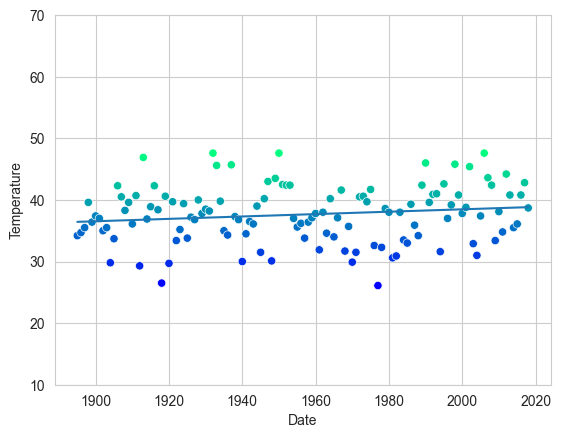

In [348]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 Insights

-- What I can gather from both modules of predicting a value using linear regression models is that both ways show temperature increasing, and predict that the 2024 temperature will reach 38 degrees Fahrenheit with the number from SciPy stats being 38.5 and the number from Sklearn being 38.9. 

Both modules can calculate a lot of statistics and can use other modules to visualize the data. Sklearn, in my opinion, has a more accurate way of calculating statistics. I would probably rely on it sklearn more that SciPy.